In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from emnist import list_datasets

In [3]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples
X_train, y_train = extract_training_samples('mnist')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

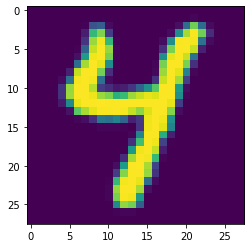

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train

array([4, 1, 4, ..., 1, 5, 0], dtype=uint8)

In [9]:
X_train.max()

255

In [10]:
X_train = X_train/255

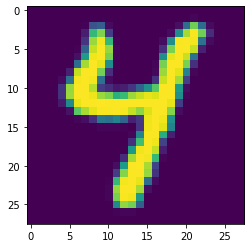

In [11]:
plt.imshow(X_train[0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [15]:
target = Sequential()
target.add(Flatten(input_shape= [28,28]))
target.add(Dense(units= 400, activation= 'relu', input_shape=[784]))
target.add(Dense(units= 200, activation= 'relu'))
target.add(Dense(units= 100, activation= 'relu'))

In [16]:
attacker = Sequential()
attacker.add(Dense(units= 200, activation= 'relu', input_shape=[100]))
attacker.add(Dense(units= 400, activation= 'relu'))
attacker.add(Dense(units= 784, activation= 'sigmoid'))
attacker.add(Reshape([28, 28]))

In [17]:
inversion = Sequential([target,attacker])

In [18]:
inversion.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0),metrics=['accuracy'])

C:\Users\aayus\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [20]:
inversion.fit(X_train, X_train, epochs=10,validation_data=[X_val, X_val],callbacks=[early_stop])

Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2702 - accuracy: 0.1749 - val_loss: 0.2067 - val_accuracy: 0.2443
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1855 - accuracy: 0.3004 - val_loss: 0.1802 - val_accuracy: 0.3144
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1659 - accuracy: 0.3454 - val_loss: 0.1659 - val_accuracy: 0.3529
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1560 - accuracy: 0.3744 - val_loss: 0.1564 - val_accuracy: 0.3677
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1493 - accuracy: 0.3955 - val_loss: 0.1487 - val_accuracy: 0.3978
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1450 - accuracy: 0.4097 - val_loss: 0.1490 - val_accuracy: 0.3945
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1418 - accuracy: 0.4201 - val_loss: 0.1432 - val_accuracy:

In [21]:
from tensorflow.keras.datasets import mnist

In [25]:
(X_test, y_test), (X,y) = mnist.load_data()

In [26]:
X_test.shape

(60000, 28, 28)

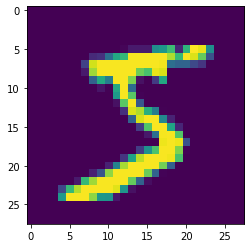

In [27]:
plt.imshow(X_test[0])

In [28]:
X_test = X_test/255

In [29]:
attacker_output = inversion.predict(X_test[:10])

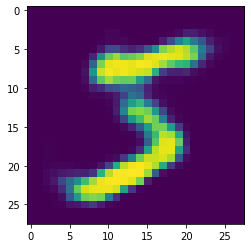

In [31]:
plt.imshow(attacker_output[0])

In [35]:
inversion.save('model_inversion.h5')